## KOSPI200_2011_22 변동성 시각화하기

In [1]:
import datetime
import pandas as pd
import numpy as np

In [2]:
variableName = 'KOSPI 200'

### ① 데이터 불러오기

In [3]:
f = pd.read_csv('C:/Users/wips/Desktop/졸업 논문/Data/KOSPI 200/rename/KOSPI200_2011_22.csv')
f = f[['Date', 'Close']]
f = f.dropna()
f.columns = ['Date', variableName]

In [4]:
# Date를 datetime으로 변경하기
f['Date'] = pd.to_datetime(f['Date'])

In [5]:
# 잘 변경 되었는지 확인하기
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2957 entries, 0 to 2956
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2957 non-null   datetime64[ns]
 1   KOSPI 200  2957 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 46.3 KB


In [6]:
f = f.sort_values(by = 'Date').reset_index(drop = True)

In [7]:
# Date를 인덱스로 설정하기
f = f.set_index("Date")

In [8]:
f

,KOSPI 200
Date,
2011-01-03,273.81
2011-01-04,275.78
2011-01-05,275.35
2011-01-06,274.72
2011-01-07,275.61
...,...
2022-12-23,302.07
2022-12-26,302.27
2022-12-27,304.22


### ② 수익률 구하기 /  ③ 결측값 제거하기

In [9]:
y = f.pct_change()  # 수익률 구하기
y = y.dropna()  # 결측값이 있는 row/column 제거

### ④ 데이터 시리즈로 변경하기 / ⑤ Mean 제거하기

In [10]:
#change DataFrame to DataSeries *데이터 프레임을 데이터 시리즈로 변경
y = y[variableName]
y -= np.mean(y)       # remove the mean *mean 제거

### ⑥ 전체 기간 plot 그리기

In [11]:
import matplotlib.pyplot as plt

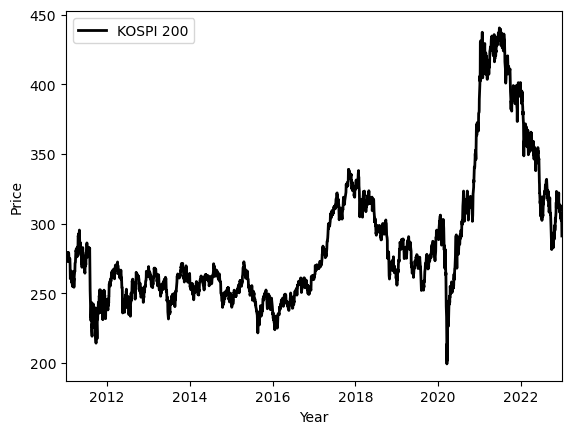

In [12]:
plt.plot(f, label=variableName, color="black", linewidth=2.0, linestyle="-")  # linewidth: 그래프 선 굵기 조정, linestyle: 선 종류 지정
plt.legend([variableName])  # legend(): 범례 표시 = 데이터의 종류를 표시하기 위한 텍스트
plt.ylabel('Price')
plt.xlabel('Year')
plt.xlim([datetime.date(2011, 1, 3), datetime.date(2022, 12, 29)])
plt.show()

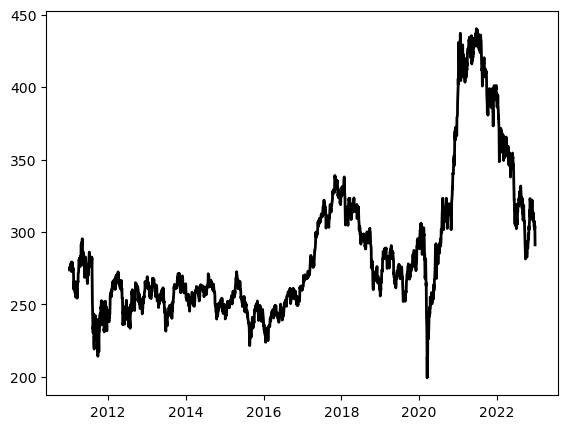

In [13]:
fig = plt.figure()  # 새로운 figure 생성
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes  # add_axes(): 각각의 상대적인 위치 지정, 모든 값은 1 미만
# 첫 0.1은 이미지의 x축의 위치, 두번째 0.1은 이미지의 y축의 시작위치, 세번째 0.8은 이미지의 가로길이, 네번째 0.8은 높이를 의미한다.
ax.plot(f, label=variableName, color="black", linewidth=2.0, linestyle="-")

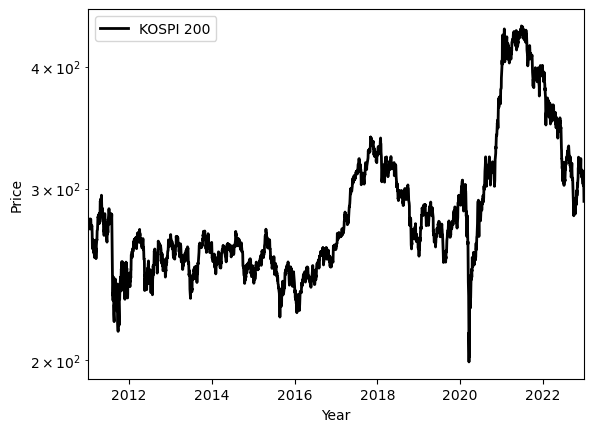

In [14]:
plt.plot(f, label=variableName, color="black", linewidth=2.0, linestyle="-")  # linewidth: 그래프 선 굵기 조정, linestyle: 선 종류 지정
plt.legend([variableName])  # legend(): 범례 표시 = 데이터의 종류를 표시하기 위한 텍스트
plt.yscale("log")  # yscale("log"): Y축을 로그 스케일 (Log scale)로 지정, 기하급수적으로 변화하는 데이터를 표현하기에 적합하다.
plt.ylabel('Price')
plt.xlabel('Year')
plt.xlim([datetime.date(2011, 1, 3), datetime.date(2022, 12, 29)])
plt.show()

In [15]:
ylabels=[100,250,500,1000,2000,3000]
ax.set_yticks(ylabels)  # set_yticks(): 눈금 설정
ax.set_yticklabels(ylabels)  # set_yticklabels(): 눈금 이름 설정

[Text(0, 100, '100'),
 Text(0, 250, '250'),
 Text(0, 500, '500'),
 Text(0, 1000, '1000'),
 Text(0, 2000, '2000'),
 Text(0, 3000, '3000')]

In [16]:
plt.show()

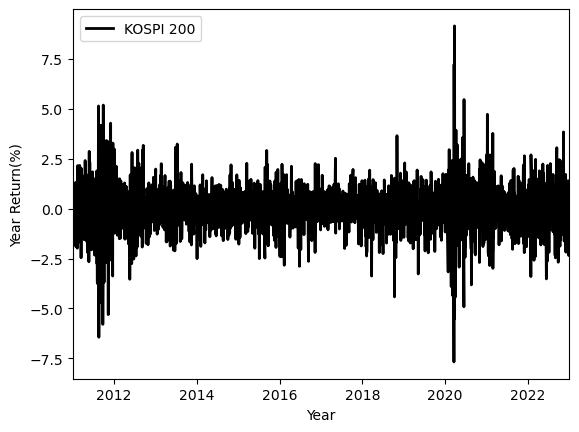

In [17]:
# 년(Year) 빈도(주기)?
plt.plot(y*100, label=variableName, color="black", linewidth=2.0, linestyle="-")
plt.legend([variableName])
plt.ylabel('Year Return(%)')
plt.xlabel('Year')
plt.xlim([datetime.date(2011, 1, 3), datetime.date(2022, 12, 30)])
plt.show()

### ⑦ Resampling 해서 월별/연간 가격 변동 시각화하기

In [18]:
# 일일 데이터를 월별, 연간 빈도로 다시 샘플링
f_month_beg = f.resample('BMS').first()  # resample(): Datetime Index를 원하는 주기로 나누어주는 메서드
f_month_end = f.resample('BM').last()

In [19]:
f_year_beg = f.resample('BYS').first()
f_year_end = f.resample('BY').last()

In [20]:
# 월/연말 데이터를 기반으로 변경 사항 계산
y_month_end = f_month_end.pct_change()  # pct_change(): 한 객체 내에서 행과 행의 차이를 현재값과의 백분율로 출력 = 수익률 출력
y_month_end = y_month_end.dropna()
y_month_end = y_month_end[variableName]
y_month_end  -= np.mean(y_month_end)       # remove the mean

In [21]:
y_year_end = f_year_end.pct_change()
y_year_end = y_year_end.dropna()
y_year_end = y_year_end[variableName]
y_year_end  -= np.mean(y_year_end)       # remove the mean

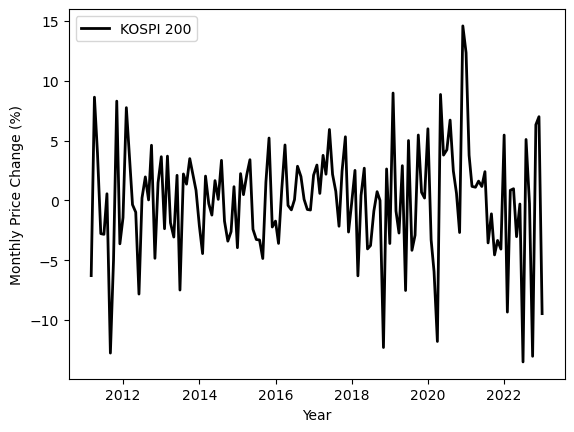

In [22]:
# 월별 가격 변동
plt.plot(y_month_end*100, label=variableName, color="black", linewidth=2.0, linestyle="-")  # 백분율을 볼 거라서 *100 해주는 것
plt.legend([variableName])
plt.ylabel('Monthly Price Change (%)')
plt.xlabel('Year')
plt.show()

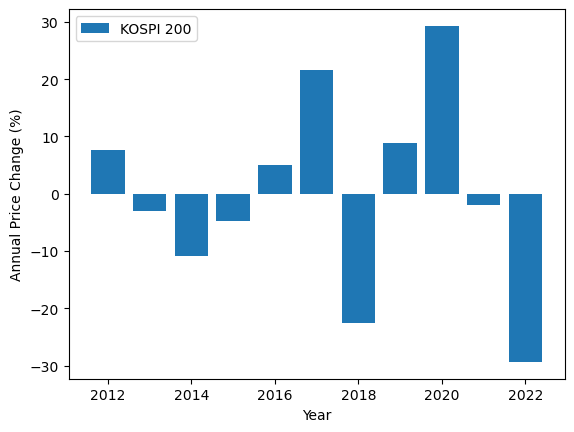

In [23]:
# 연간 가격 변동
plt.bar(y_year_end.index.year, y_year_end*100)
plt.legend([variableName])
plt.ylabel('Annual Price Change (%)')
plt.xlabel('Year')
plt.show()

### ⑧ 기본 요약 통계 출력하기

In [24]:
import numpy as np

In [25]:
print(sum(y))          # y의 모든 원소의 합
print(max(y))          # y의 최대값
print(min(y))          # y의 최소값
print(np.mean(y))      # 산술 평균
print(np.median(y))    # 중앙값
print(np.var(y))       # 분산
print(np.cov(y))       # covar matrix 코바 행렬 = 단일 벡터에 대한 분산
print(np.corrcoef(y))  # corr matrix = [1] for single vector
#print(np.sort(y))      # 오름차순 정렬
#print(np.log(y))       # natural log

2.4494295480792516e-15
0.09141240019549667
-0.07676284692249337
3.8027767673645837e-19
0.0002810394373227082
0.00012274522354326447
0.0001227867616899799
1.0


### ⑨ 수익률의 분산, 비대칭, 과잉 첨도 출력하기

In [26]:
from scipy import stats

In [27]:
print(stats.skew(y))                     # skewness 비대칭
print(stats.kurtosis(y))                # 과잉 첨도
# *첨도: 도수 곡선의 최빈치를 중심으로 하는 부분의 완만함·뾰족함의 정도를 나타내는 수치.

-0.029287363296105675
5.595718556681055


In [28]:
def excess_kurtosis(x, excess = 3):        # 참고: excess 옵션(선택 사항), default = 3
    m4=np.mean((x-np.mean(x))**4)          # 참고: Python에서는 exponentiation를 **로 사용하여 표현(?)한다.
    excess_kurt=m4/(np.std(x)**4)-excess
    return excess_kurt

In [29]:
def moment(x, n):        # 참고: nth moment 계산
    if n==1:
        return np.mean(x)
    elif n==2:
        return np.var(x)
    else:
        return np.mean((x-np.mean(x))**n)/(np.std(x)**n)

In [30]:
print(excess_kurtosis(y))

5.59571855668109


In [31]:
print(moment(y,1))          # 평균
print(moment(y,2))          # 분산
print(moment(y,3))          # 비대칭
print(moment(y,4))          # 첨도

3.8027767673645837e-19
0.00012274522354326447
-0.029287363296105713
8.59571855668109


### ⑩ QQ Plot 그리기

In [32]:
from statsmodels.graphics.gofplots import qqplot

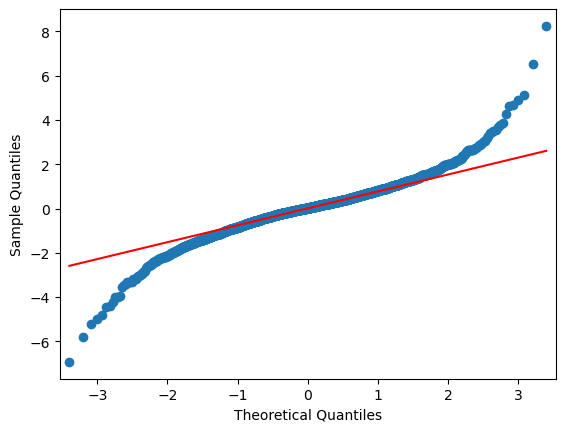

In [33]:
fig1 = qqplot(y, line='q', dist = stats.norm, fit = True)  # dist 옵션: 정규 분포가 아닌 다른 분포와 비교해보기          
plt.show()
plt.close()  # Figure를 지우고 창을 닫으므로 스크립트는 출력을 생성하지 않는다. = 자동으로 창 닫기

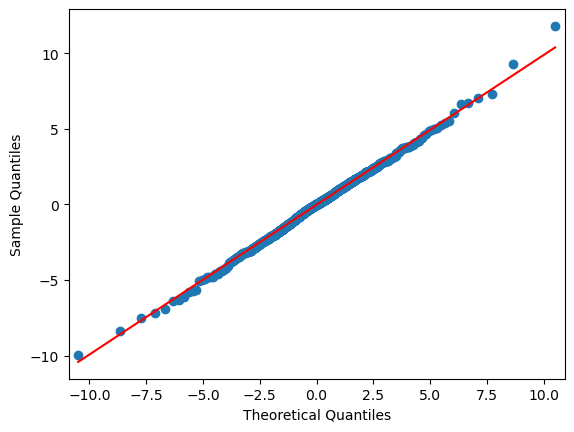

In [34]:
fig2 = qqplot(y, line='q', dist = stats.t, distargs=(5,), fit = True)
plt.show()
plt.close()

### ⑪ 변동성을 추정하는 MA Model

In [35]:
import pandas as pd
import matplotlib.ticker as ticker

In [36]:
WE = 20
T = len(y)

In [37]:
volUnconditional = np.std(y, ddof=1) *np.sqrt(252)
# std(): 배열에있는 모든 값의 표준 편차 계산 / sqrt(): 괄호 안의 수의 제곱근을 계산
# ddof=1 옵션: 무한 모집단 분산의 편향되지 않은 추정치를 제공합니다.
# ddof=0 옵션: 정규 분포 변수에 대한 분산의 최대 우도 추정치를 제공합니다.

In [38]:
vols = np.zeros(T)  # zeros(): 0으로만 채워진 array 생성

In [39]:
for t in range(WE,T):
    t1 = t-WE
    window = y[t1:t]      # window 견적
    vols[t] = np.std(window, ddof=1) *np.sqrt(252)

In [40]:
volMA = pd.Series(vols[WE:], index=y.index[WE:])  # Series 생성
volMA.name = 'Vol (MA)'

In [41]:
def plotVol(volData, volUncond, type):
    
    if type == 'plot':  # type이 plot이면 plot 그리기
        plt.plot(volData)
    elif type == 'bar':  # type이 bar이면 bar 그리기
        plt.bar(volData.index, volData, width=40/len(volData))
                
    plt.xlabel('Year')
    plt.ylabel('Volatility (%)')  # 변동성
    plt.axhline(y = volUncond, color='r', linestyle='-', linewidth = 6)  # 특정 위치에 수직선 혹은 수평선을 그리기
    

    plt.gca().yaxis.set_major_formatter(
            ticker.PercentFormatter(xmax=1, decimals=0))
    plt.title(volData.name)    
    plt.show()

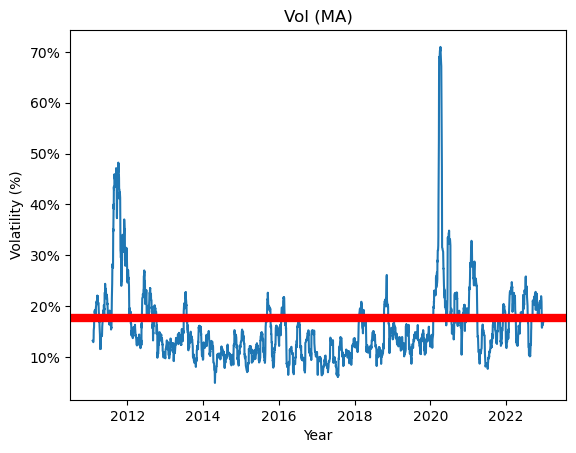

In [42]:
plotVol(volMA, volUnconditional, 'plot')

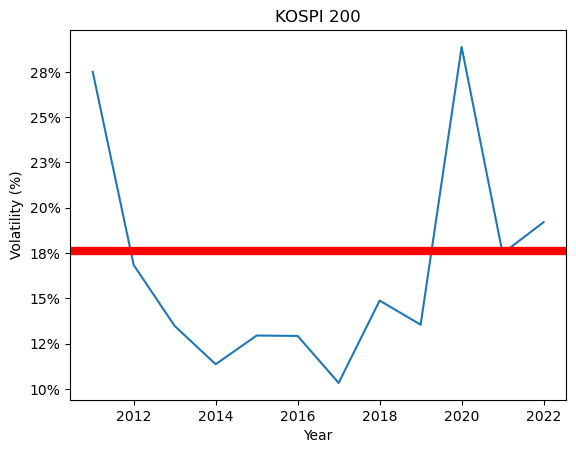

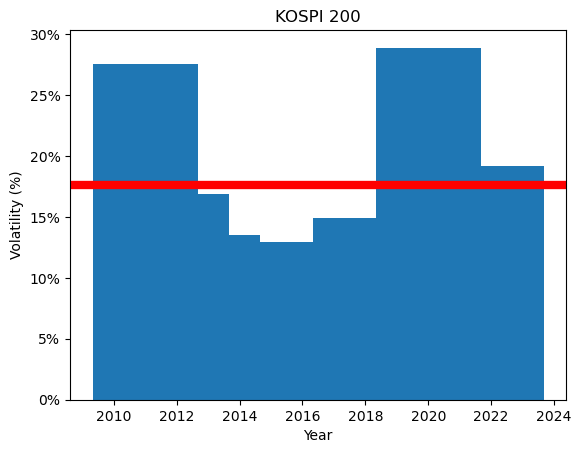

In [43]:
vol_annual = y.groupby(y.index.year).agg(np.std)*np.sqrt(252)
# groupby(): 데이터를 그룹별로 분할하여 독립된 그룹에 대하여 별도로 데이터를 처리(혹은 적용)하거나 그룹별 통계량을 확인
# agg(): 다중 집계 작업을 간결하게 나타내기 = 여러 함수를 동시에 입력/출력 가능
plotVol(vol_annual, volUnconditional, 'plot')
plotVol(vol_annual, volUnconditional, 'bar')

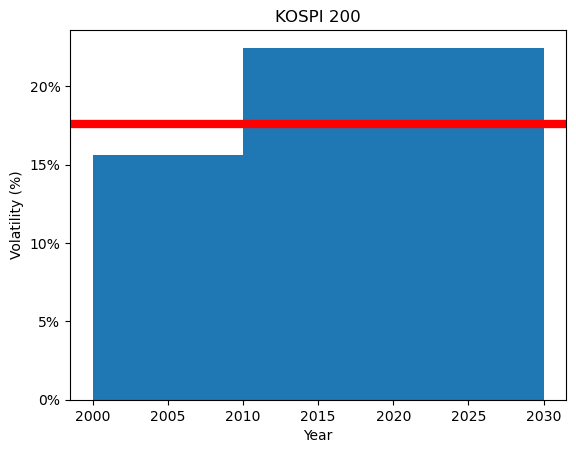

In [44]:
vol_decades = y.groupby(y.index.year//10).agg(np.std)*np.sqrt(252)
vol_decades.index *= 10
plotVol(vol_decades, volUnconditional, 'bar')

### ⑫ 지수가중평균(EWMA) 변동성

In [45]:
T = len(y)
EWMA = np.zeros(T)  # 0으로 채워진 array 생성

In [46]:
lmbda = 0.94

In [47]:
S = np.var(y)  # 배열 요소의 분산 계산

In [48]:
for i in range(1,T):
    S = lmbda * S + (1-lmbda) * y[i-1]**2
    EWMA[i] = np.sqrt(S)*np.sqrt(252)

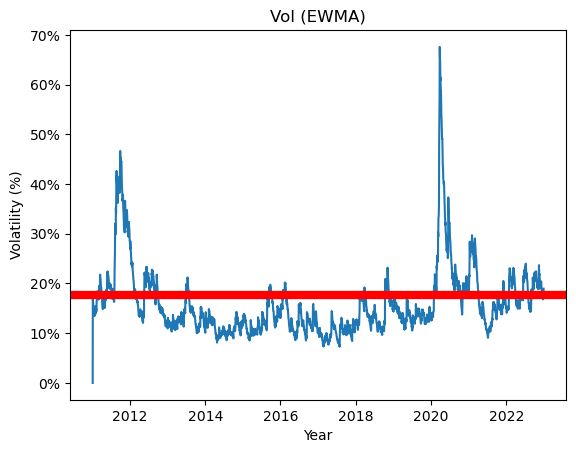

In [49]:
volEWMA = pd.Series(EWMA, y.index)
volEWMA.name = 'Vol (EWMA)'
plotVol(volEWMA, volUnconditional, 'plot')

### ⑬ 분포 적합선, QQ Plot, 히스토그램 그리기

In [50]:
import scipy.stats as sps

In [51]:
NumS = 10000

In [52]:
y *= 100            # 백분율로 변환
# 첫 번째 정규 분포를 fit시킵니다
mu, sigma = sps.norm.fit(y)
print('Normal distribution fit parameters: mu = {:6.3f}, sigma = {:6.3f}'.format(mu, sigma))
# student t fit
df, loc, scale = sps.t.fit(y)
# 정규 분포 적합 모수
print('Normal distribution fit parameters: \
      df = {:6.3f}, loc = {:6.3f}, scale = {:6.3f}'.format(df, loc, scale))

Normal distribution fit parameters: mu = -0.000, sigma =  1.108
Normal distribution fit parameters:       df =  3.719, loc =  0.022, scale =  0.773


In [53]:
# QQ plot
from statsmodels.graphics.gofplots import qqplot

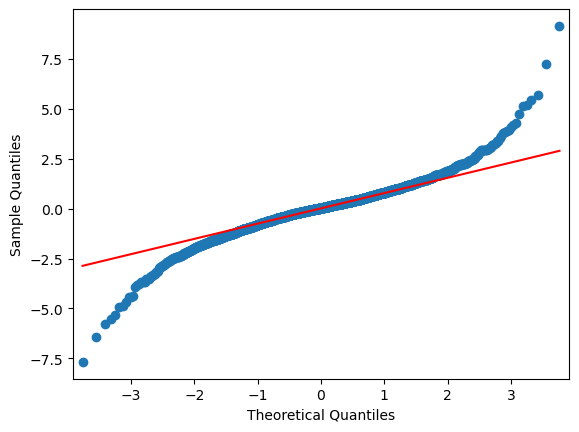

In [54]:
# sps.norm: 정규 분포 확인
fig1 = qqplot(y, line='q', dist = sps.norm, loc = mu, scale = sigma)               
plt.show()
plt.close()

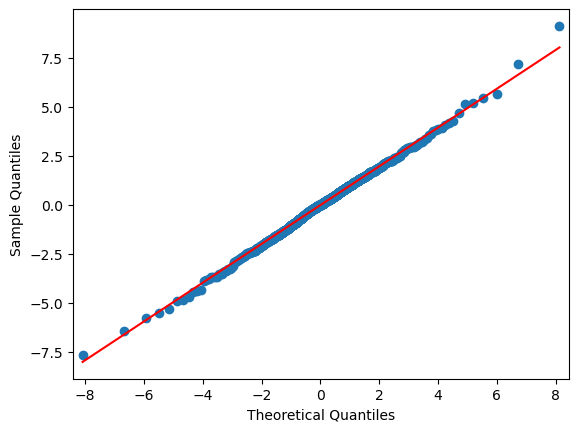

In [55]:
# sps.t: t 분포 확인
fig2 = qqplot(y, line='q', dist = sps.t, distargs=(df,), 
              loc = loc, scale = scale)
plt.show()
plt.close()

In [56]:
# 정규 분포를 기반으로 한 시뮬레이션
yn = sps.norm.rvs(mu, sigma, size = NumS)  # norm: 가우시안 정규 분포 / rvs: 랜덤 샘플 생성 

In [57]:
# t 분포를 기반으로 한 시뮬레이션
yt = sps.t.rvs(df, loc, scale, size = NumS)

In [58]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')  # matplotlib에서 사용할 수 있는 스타일시트 중 seaborn-deep 사용

C:\Users\wips\AppData\Local\Temp\ipykernel_5988\612802579.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')  # matplotlib에서 사용할 수 있는 스타일시트 중 seaborn-deep 사용


In [59]:
bins = np.linspace(-10, 10, 30)  # 구간 내에 숫자 채우기
# np.linspace(구간 시작점, 구간 끝점, 구간 내 숫자 개수)

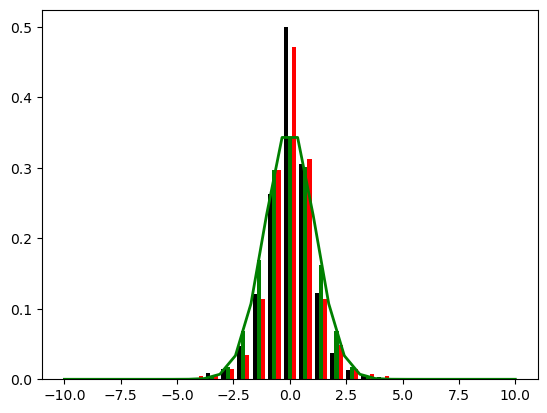

In [60]:
# 히스토그램 그리기
count, bins, ignored = plt.hist([y, yn, yt], bins,
         label=['Actual', 'Normal','t Dist'], 
         color = ['k', 'g', 'r'], density = True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='g')

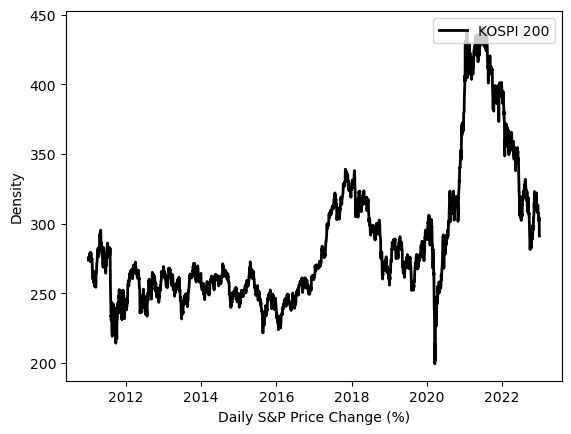

In [61]:
plt.plot(f, label=variableName, color="black", linewidth=2.0, linestyle="-")  # linewidth: 그래프 선 굵기 조정, linestyle: 선 종류 지정
plt.legend(loc='upper right')  # 범례 작성
plt.xlabel('Daily S&P Price Change (%)')  # 일별 S&P 가격 변동
plt.ylabel('Density')
plt.show()

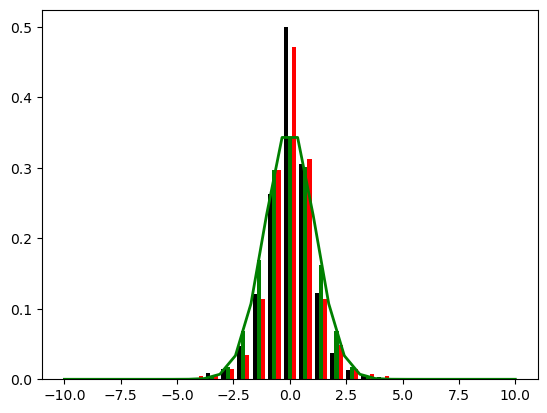

In [62]:
count, bins, ignored = plt.hist([y, yn, yt], bins, 
        label=['Actual', 'Normal','t Dist'], 
        color = ['k', 'g', 'r'], density = True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='g')

### ⑭ Subplot 예제

In [63]:
import matplotlib.pyplot as plt

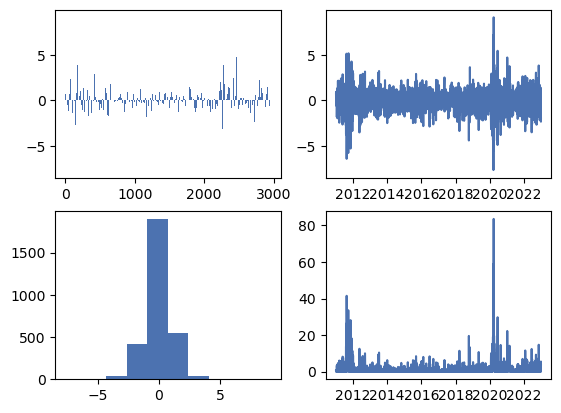

In [64]:
# plt.figure(figsize=(10,10))
plt.figure(2)
plt.subplot(2,2,1)
plt.bar(range(len(y)), y)
plt.subplot(2,2,2)
plt.plot(y)
plt.subplot(2,2,3)
plt.hist(y)
plt.subplot(2,2,4)
plt.plot(y**2)
plt.show()